### Преобразование Радона

Рассмотрим простое изображение.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale


from skimage.draw import disk

mask = np.zeros((100, 100), dtype=np.uint8)
row = 40
col = 60
radius = 20
# modern scikit uses a tuple for center
rr, cc = disk((row, col), radius)
mask[rr, cc] = 1

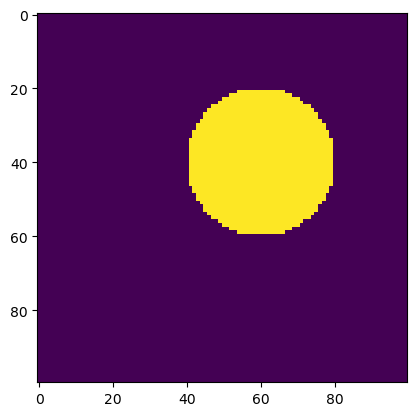

In [8]:
plt.imshow(mask)

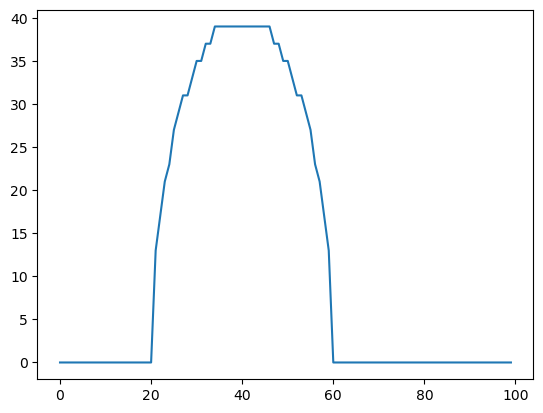

In [10]:
plt.plot(np.sum(mask, axis = 1))

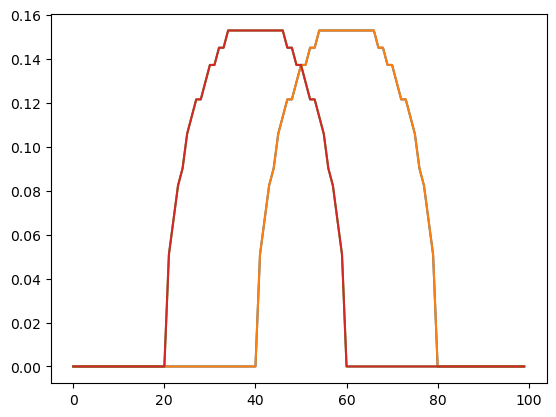

In [12]:
img = mask
theta = np.array([0, 90, 180, 270])
projs = radon(img, theta=theta)
plt.plot(projs)

Добавим второй диск на изображении.

In [18]:
mask = np.zeros((100, 100), dtype=np.uint8)
rr, cc = disk((40, 60), 20)
mask[rr, cc] = 1

rr, cc = disk((80, 60), 10)
mask[rr, cc] = 1

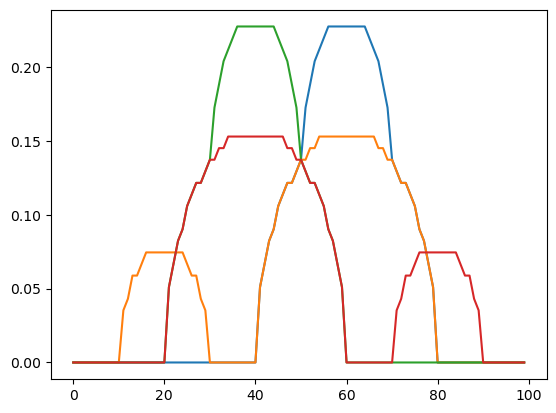

In [20]:
img = mask
theta = np.array([0, 90, 180, 270])
projs = radon(img, theta=theta)
plt.plot(projs)

Проведём восстановление изображение сложением обратных проекций.

In [29]:
from skimage.transform import iradon

theta = np.linspace(0.0, 180.0, max(img.shape), endpoint=False)
projs = radon(img, theta=theta)

img_rec = iradon(projs, theta=theta, output_size=100, filter_name=None, interpolation='linear', circle=False, preserve_range=True)

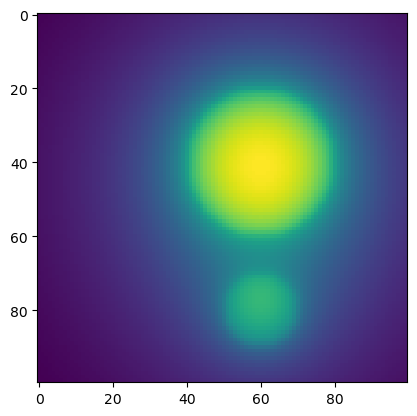

In [31]:
plt.imshow(img_rec)

Восстановление в целом успешно. Но по факту восстановление не точное, так как есть эффект размытия границы.

Кроме того, более мелкий круг будет "затенён" большим кругом, что снижает точность восстановления.

Можно также посмотреть на синограмму изображения.

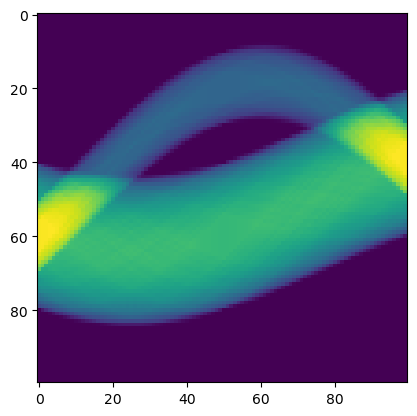

In [21]:
plt.imshow(projs)

Посмотрим на работу метода Filtered Backprojections. Для этого в методе `iradon()` надо установить параметр 
`filter_name = ramp` (на самом деле это значение по умолчанию).

Среди доступных фильтров можно выбрать `shepp-logan, cosine, hamming, hann`.


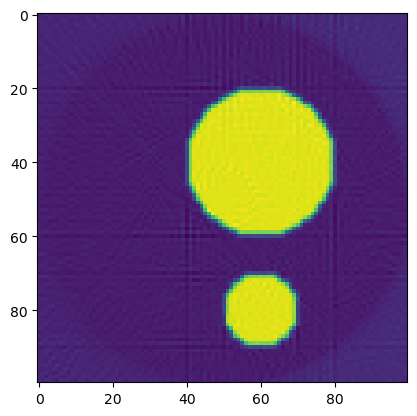

In [33]:
img_rec = iradon(projs, theta=theta, output_size=100, filter_name='ramp', interpolation='linear', circle=False, preserve_range=True)

plt.imshow(img_rec)

Восстановление более чёткое. Ещё более лучшее качество можно получить с другим выбором фильтра.

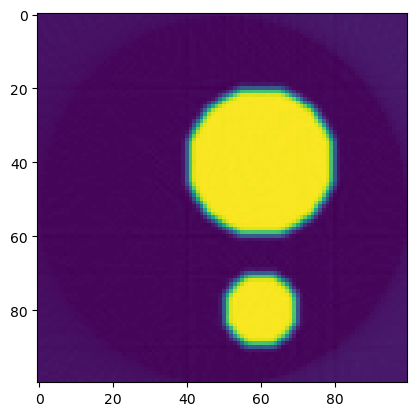

In [35]:
img_rec = iradon(projs, theta=theta, output_size=100, filter_name='hamming', interpolation='linear', circle=False, preserve_range=True)

plt.imshow(img_rec)

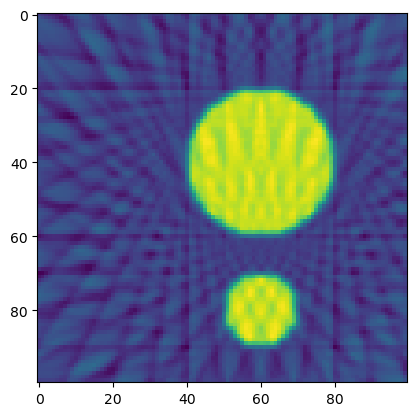

In [37]:
from skimage.transform import iradon

theta = np.linspace(0.0, 180.0, 20, endpoint=False)
projs = radon(img, theta=theta)

img_rec = iradon(projs, theta=theta, output_size=100, filter_name='hamming', interpolation='linear', circle=False, preserve_range=True)
plt.imshow(img_rec)

Рассмотрим более сложный тестовый пример.

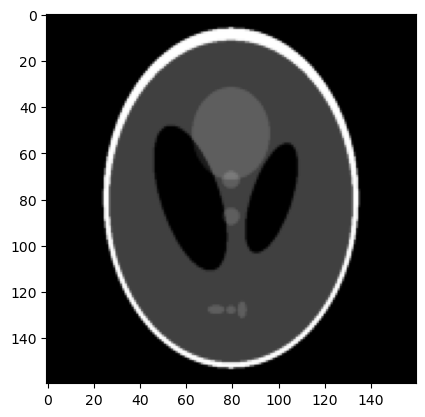

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect', channel_axis=None)

plt.imshow(image, cmap=plt.cm.Greys_r)

Text(0, 0.5, 'Projection position (pixels)')

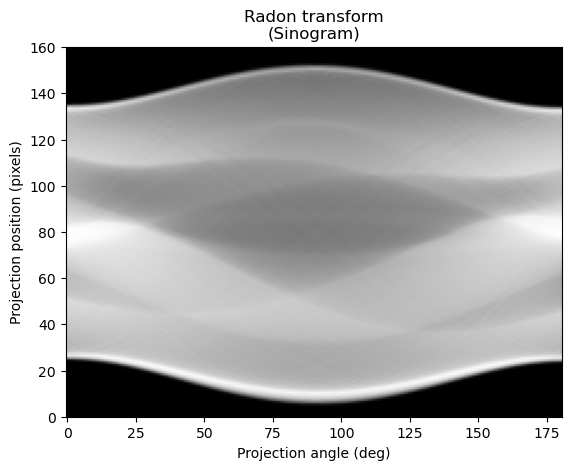

In [57]:
theta = np.linspace(0.0, 180.0, max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)

dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]

plt.imshow(
    sinogram,
    cmap=plt.cm.Greys_r,
    extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
    aspect='auto',
)
plt.title("Radon transform\n(Sinogram)")
plt.xlabel("Projection angle (deg)")
plt.ylabel("Projection position (pixels)")

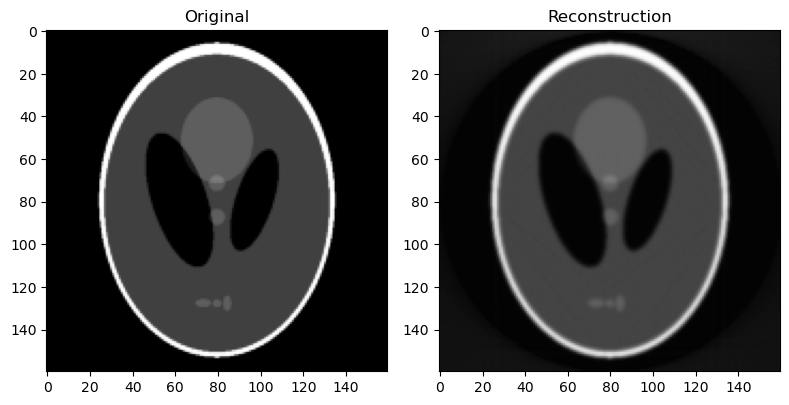

In [55]:
img_rec = iradon(sinogram, theta=theta, output_size=max(image.shape), filter_name='hamming', interpolation='linear', circle=False, preserve_range=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

ax2.set_title("Reconstruction")
ax2.imshow(img_rec, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()